In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings
import pickle
from tqdm.notebook import tqdm
import os
warnings.filterwarnings('ignore')

In [2]:
def remove_empty_list(tag_list):
    while('' in tag_list):
        tag_list.remove('')
    return tag_list

def transform_dataframe(df):
    df["tags"] = df["tags"].apply(lambda x:  x[1:-1].split(','))
    df["tags"] = df["tags"].apply(lambda x: remove_empty_list(x))
    df["tag_count"] = df["tags"].apply(lambda x: len(x))
    return df

def load_reports():
    reports_list = []
    dataframes_list = []
    files_list = sorted(os.listdir("exports"))
    for report in tqdm(files_list):
        report_csv = pd.read_csv("exports/{}".format(report), index_col=["Unnamed: 0"])["tags"]
        dataframe = pd.DataFrame(data=report_csv)
        dataframe.name = report.split(".")[0]
        reports_list.append(dataframe)
    for report in tqdm(reports_list):
        dataframe = transform_dataframe(report)
        dataframes_list.append(dataframe)
    return dataframes_list

In [2]:
benchmarks = pd.read_csv("benchmarks.csv")

In [3]:
benchmarks

,name,time (s)
0,10_highly_30_topics_30_words_LDA,125.918665
1,10_highly_30_topics_50_words_LDA,149.991872
2,10_highly_50_topics_30_words_LDA,154.445807
3,10_highly_50_topics_50_words_LDA,193.071323
4,50_highly_30_topics_30_words_LDA,336.376893
5,50_highly_30_topics_50_words_LDA,374.021504
6,50_highly_50_topics_30_words_LDA,391.383533
7,50_highly_50_topics_50_words_LDA,447.368819
8,100_highly_30_topics_30_words_LDA,591.587312
9,100_highly_30_topics_50_words_LDA,640.906797


In [5]:
dataframes_list = load_reports()

In [6]:
def show_distributions(dataframes_list):
    dataframes_list_length = len(dataframes_list)
    fig = plt.figure(figsize=(12, 6*dataframes_list_length/2))
    for idx, dataframe in enumerate(dataframes_list):
        counts, bins = np.histogram(dataframe["tag_count"], bins=dataframe["tag_count"].max())
        x1 = dataframe["tag_count"][(dataframe["tag_count"] <= 3) & (dataframe["tag_count"] >= 0)]
        x2 = dataframe["tag_count"][(dataframe["tag_count"] > 3) & (dataframe["tag_count"] <= 20)]
        x3 = dataframe["tag_count"][(dataframe["tag_count"] > 20)]
        ax = fig.add_subplot(dataframes_list_length, 2, idx+1)
        ax.hist(x1, label=len(x1), bins=bins, color="#C72222")
        ax.hist(x2, label=len(x2), bins=bins, color="#B3DEEE")
        ax.hist(x3, label=len(x3), bins=bins, color="#F9A811")
        ax.set_xlim([0, 25])
        ax.set(xlabel="Number of Tags", ylabel="Number of documents", title=f"Distribution of {dataframe.name}")
        ax.legend()
    fig.tight_layout()
    fig.show()

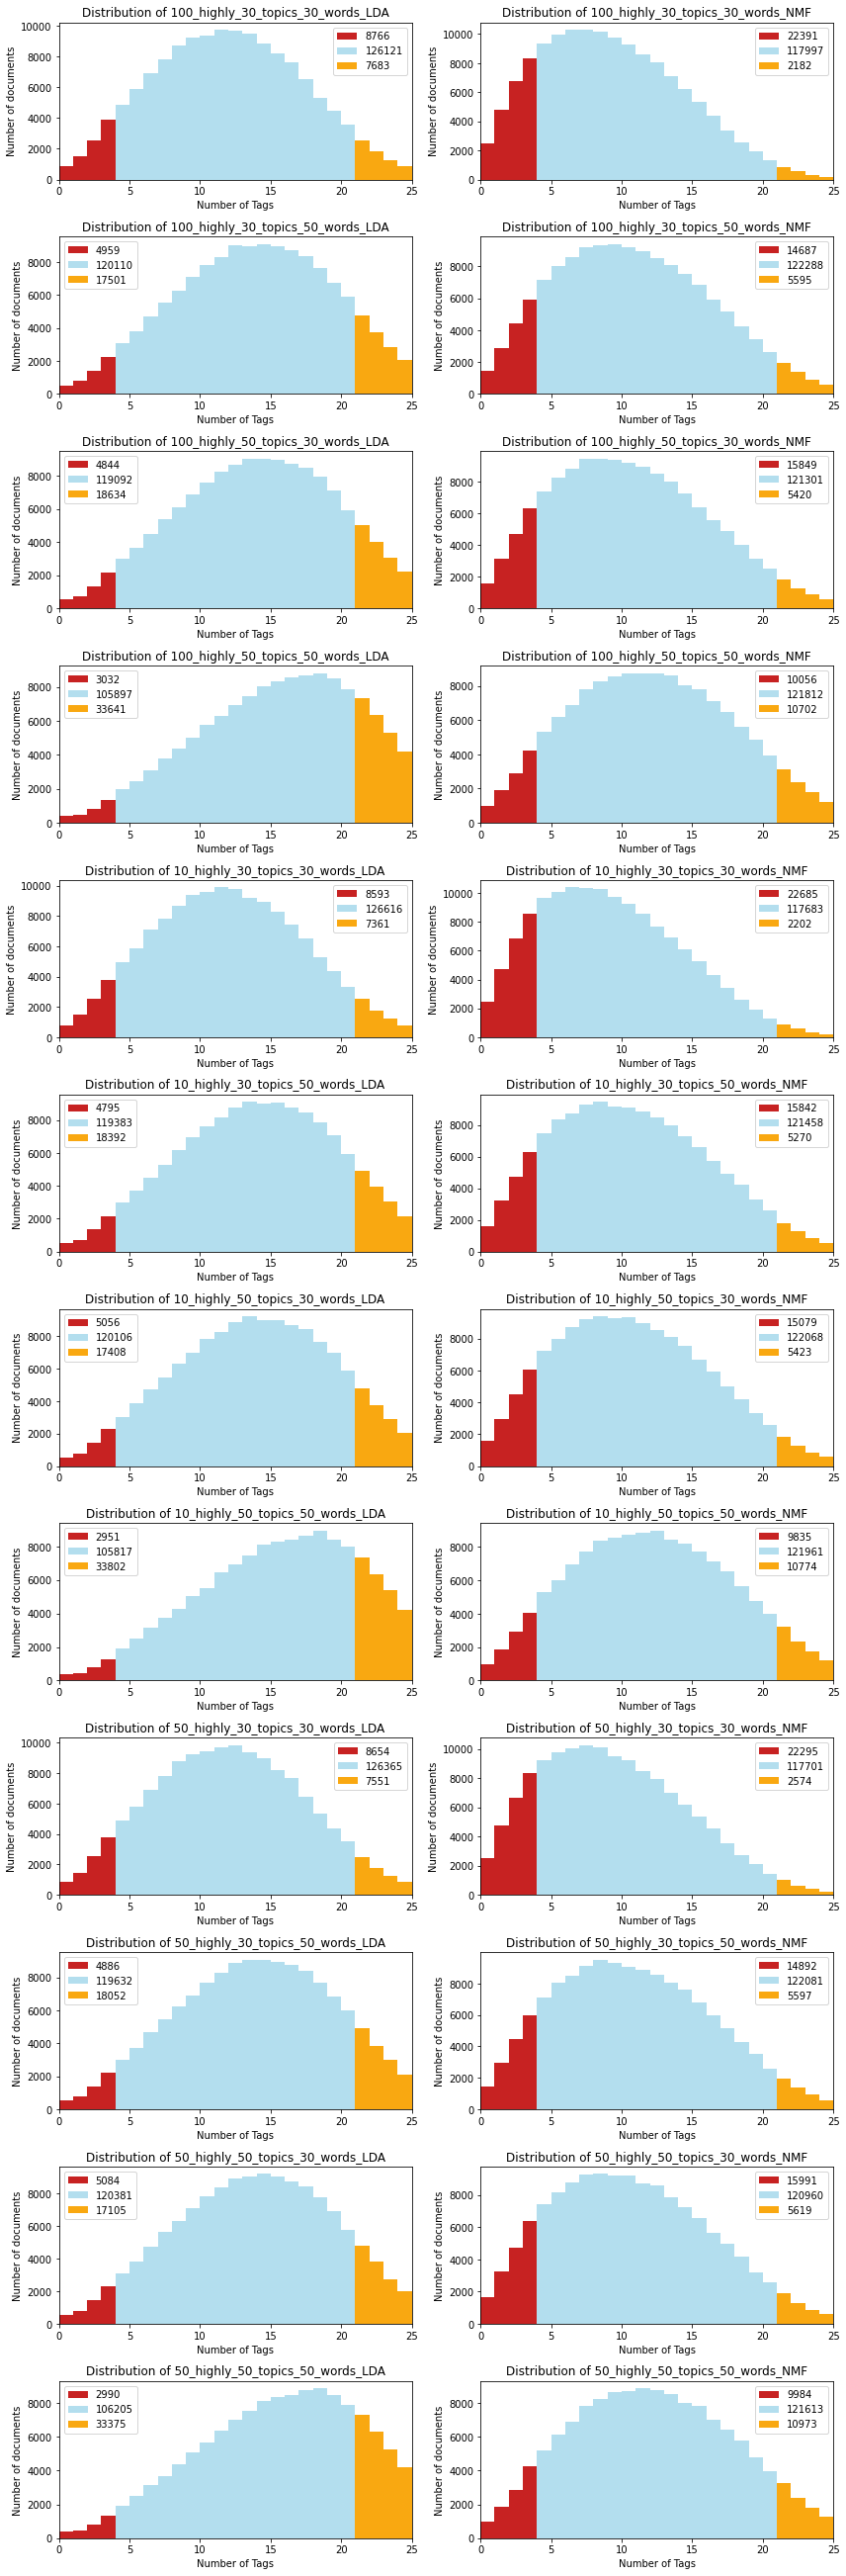

In [7]:
show_distributions(dataframes_list)

In [3]:
best = pd.read_csv("exports/10_highly_30_topics_30_words_LDA.csv", index_col=["Unnamed: 0"])
best = transform_dataframe(best)

In [4]:
best

,content,tags,tag_count
0,"Patriots Day, Peter Berg’s new thriller that r...","['day', 'movie', 'peter', 'boston', 'film'...",8
1,"In Norse mythology, humans and our world were ...","['re', 'billion', 'years', 'group', 'host'...",7
2,“If our democracy is to work in this increasin...,"['nation', 'barack', 'obama', 'person', 's...",9
3,Updated on January 11 at 5:05 p. m. In his fir...,"['trump', 'donald', 'on', 'january', 'pres...",19
4,Updated at 12:25 p. m. After months of equivoc...,"['donald', 'trump', 'democratic', 'national...",14
...,...,...,...
142565,"As chairman and CEO of ExxonMobil, Rex Tillers...","['climate', 'change', 'tillerson', 'ceo', ...",21
142566,I’ve spent nearly 20 years looking at intellig...,"['trump', 'fbi', 'intelligence', 'donald', ...",16
142567,Donald Trump will not be taking necessary st...,"['trump', 'organization', 'tower', 'interna...",14
142568,Dozens of colleges could be forced to close ...,"['schools', 'students', 'community', 'feder...",16


In [6]:
best[["content"]][best["tag_count"] == 0]

,content
192,Create your own user feedback survey
227,The trio of devices in the back of the plane h...
754,Create your own user feedback survey
1037,"4. Peer pressure. In 2012, the singer and Assa..."
1083,"Taste is the oldest of our five senses, and ye..."
...,...
141902,"’J. Crew is struggling to grow sales, as the b..."
141923,’ ’ ’ ’ ’ ’ ’ ’ ’ ’ ’ ’ ’ ’ ’...
142189,’Too chicken to eat fowl for breakfast? Think ...
142306,”The team writes about stuff we think you’ll ...
